# Coronary Heart Disease


A retrospective sample of males in a heart-disease high-risk region
of the Western Cape, South Africa. There are roughly two controls per
case of CHD. Many of the CHD positive men have undergone blood
pressure reduction treatment and other programs to reduce their risk
factors after their CHD event. In some cases the measurements were
made after these treatments. These data are taken from a larger
dataset, described in  Rousseauw et al, 1983, South African Medical
Journal. 

- *sbp*	-	systolic blood pressure
- *tobacco*	-	cumulative tobacco (kg)
- *ldl*	-	low densiity lipoprotein cholesterol
- *adiposity* - https://en.m.wikipedia.org/wiki/Body_adiposity_index
- *famhist*	-	family history of heart disease (Present, Absent)
- *typea*	-	type-A behavior
- *obesity* - https://en.wikipedia.org/wiki/Obesity
- *alcohol*	-	current alcohol consumption
- *age*	-	age at onset
- *chd*	-	response, coronary heart disease

The dataset is taken from 

http://www-stat.stanford.edu/~tibs/ElemStatLearn/datasets/SAheart.data

Description is available at

https://web.stanford.edu/~hastie/ElemStatLearn/datasets/SAheart.info.txt

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

### Step 1: Loading the dataset

- Load the data file SAheart.data. This is csv file.

In [18]:
hearts_df = pd.read_csv("./SAheart.data")

### Step 2: Finding Metadata 

- Find how many rows and columns available in the dataset.
- Find the columns types of the dataset.

In [19]:
hearts_df.shape

(462, 11)

### Step 3: Print Records

- Print first 5 records of the dataset
- Print last 5 records of the dataset
- Print records with index ranging from 10 to 20 with columns "sbp", "ldl" and "chd".

In [20]:
hearts_df[0:5]

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [21]:
hearts_df[-5:]

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
457,459,214,0.4,5.98,31.72,Absent,64,28.45,0.00,58,0
458,460,182,4.2,4.41,32.10,Absent,52,28.61,18.72,52,1
459,461,108,3.0,1.59,15.23,Absent,40,20.09,26.64,55,0
460,462,118,5.4,11.61,30.79,Absent,64,27.35,23.97,40,0
461,463,132,0.0,4.82,33.41,Present,62,14.70,0.00,46,1


In [22]:
hearts_df[["sbp","ldl","chd"]][10:20]

,sbp,ldl,chd
10,206,2.95,1
11,134,4.44,1
12,118,1.88,0
13,132,1.87,0
14,112,2.29,0
15,117,2.44,0
16,120,15.33,0
17,146,8.29,1
18,158,7.46,1
19,124,6.23,1


### Step 4: How many persons have *chd* and *no chd* in the dataset?

- Normalize the results with respect to total number of records in the dataset

In [23]:
hearts_df.chd.value_counts()

0    302
1    160
Name: chd, dtype: int64

### Step 5: Does *famhist* have any impact on *chd*?

https://seaborn.pydata.org/generated/seaborn.catplot.html

Note: Draw a catplot. Refer to the link below. Set the values as below.

- x = 'famhist'
- kind = 'count'
- hue = 'chd'


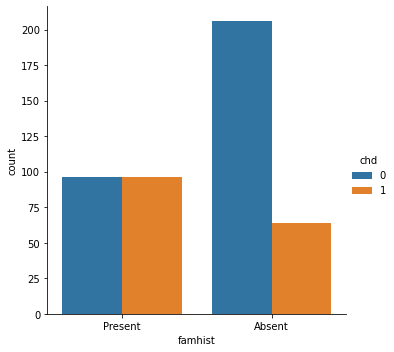

In [31]:
sn.catplot(data = hearts_df, x='famhist',kind='count',hue='chd')

### Step 6: Is there any difference in alcohol consumption pattern between persons having *chd* and persons having *no chd*?

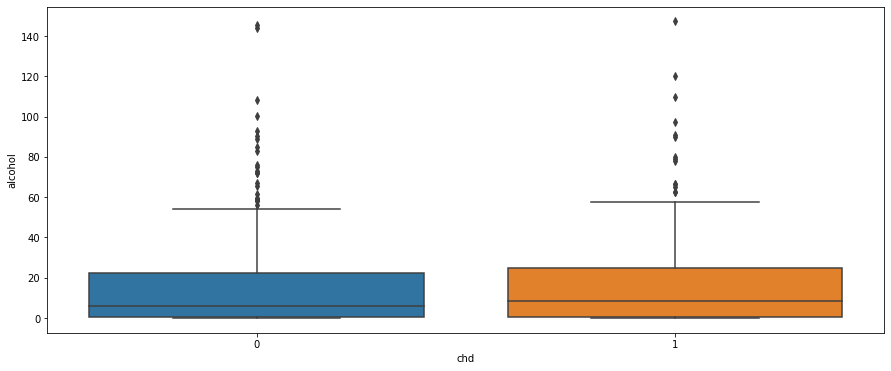

In [32]:
plt.figure(figsize=(15, 6))
sn.boxplot(data = hearts_df,
           x = 'chd',
           y = 'alcohol');

### Step 7: Does *age* has any impact on *chd*?

Note: Overlapped distribution plot.

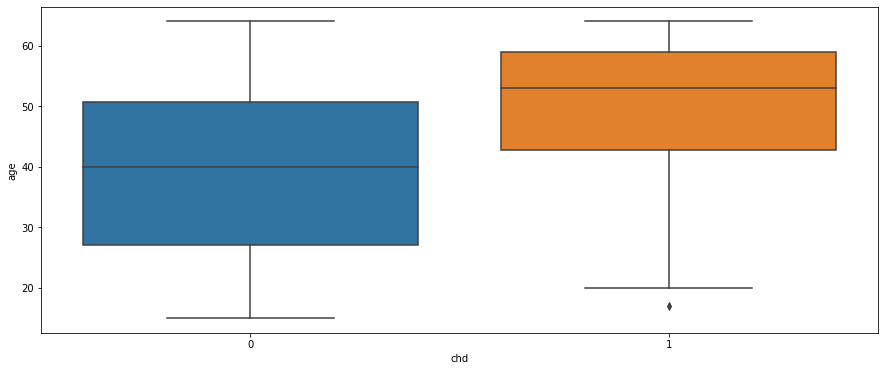

In [33]:
plt.figure(figsize=(15, 6))
sn.boxplot(data = hearts_df,
           x = 'chd',
           y = 'age');

### Step 8: Create a column called "has_famhist" and set to 1 if the person has famhist "Present" or set to 0 if the person has famhist "Absent"

In [40]:
hearts_df['has_famhist'] = hearts_df['famhist'].map(lambda x: int('Present'in x)) #('Present' in x) = (if (x == "Present"))
hearts_df

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd,has_famhist
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1,0
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0,1
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0,0
458,460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1,0
459,461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0,0
460,462,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0,0


### Step 9: Are ldl and obesity correlated? Do they have positive or negative correlation?

Note: Draw a scatter plot.

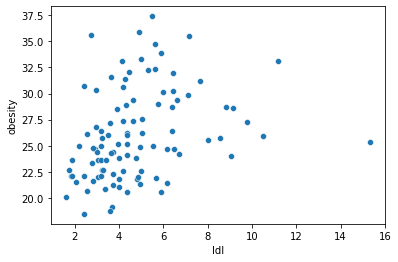

In [51]:
sn.scatterplot(data=hearts_df.sample(100),x='ldl',y='obesity');

In [53]:
corr1 = hearts_df[['ldl','obesity']].corr()
corr1

,ldl,obesity
ldl,1.000000,0.330506
obesity,0.330506,1.000000


### Step 10: Create a heatmap between the following variables?

- ldl
- obeisity
- tobacco
- age
- sbp
- typea

Infer which two variables are most correlated?

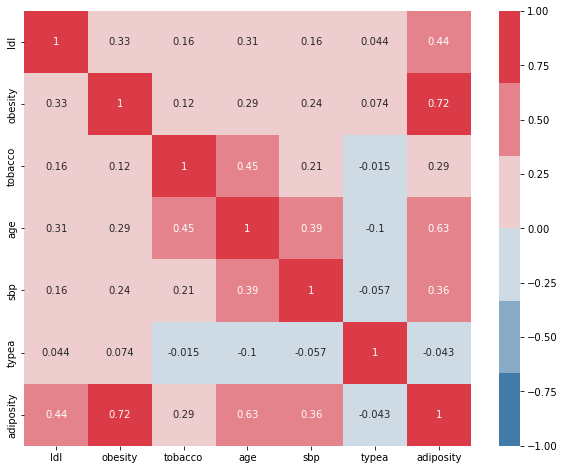

In [82]:
corr_mat = hearts_df[['ldl','obesity','tobacco','age','sbp','typea','adiposity']].corr()
plt.figure(figsize=(10,8))
sn.heatmap(corr_mat, annot=True, vmin= -1.0, vmax = 1.0, cmap = sn.diverging_palette(240,10));

### Step 11: What is the range of ldl and sbp for 95% of people suffering from chd?

In [65]:
hearts_chd_df = hearts_df[hearts_df.chd>0]

In [66]:
from scipy import stats
stats.norm.interval(0.95,
                    hearts_chd_df['ldl'].mean(),
                    hearts_chd_df['ldl'].std())

(1.1268745781411615, 9.84900042185884)

In [67]:
from scipy import stats
stats.norm.interval(0.95,
                    hearts_chd_df['sbp'].mean(),
                    hearts_chd_df['sbp'].std())

(97.3305157486581, 190.1444842513419)

### Step 12: Are the age of some people suffering from chd seem abnormal i.e. very low age?

Note: Find Outliers

In [68]:
from scipy import stats
stats.norm.interval(0.997,
                    hearts_chd_df['age'].mean(),
                    hearts_chd_df['age'].std())

(18.68995583935335, 81.89754416064653)

In [83]:
abnormal_age_chd=hearts_df[(hearts_df.age<18)&(hearts_df.chd>0)]
abnormal_age_chd

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd,has_famhist
260,261,118,0.0,2.39,12.13,Absent,49,18.46,0.26,17,1,0


# Note:

## **Created by**: Stuti Sharma
### April 2021